# Influences of Countries on a Movie's Success

In this section, we delve into the global landscape of the movie industry, examining key trends in film production, box office performance, language distribution, and genre preferences across the top 20 most influential countries to highlight the regions with the greatest impact and activity in the global film industry.

Let us firs import all the necessary librairies for our analysis and exploration

In [146]:
# For dataframe manipulation 
import pandas as pd
import pickle

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the DeprecationWarning for bar graph hues
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [147]:
# Importing the CMU Movies Dataframe that we created in a different pipeline
file_path = "../../pickles/cmu_movies_df.pkl" 
with open(file_path, 'rb') as f:
    df_countries = pickle.load(f)
    
df_countries.head()


,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Release Date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,Genre Freebase ID,Genre Name
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]","[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]","[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]","[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],[/m/07s9rl0],[Drama]


Since we are primarily focused on analyzing the data within the dataset itself (genres, box office revenues, etc.), the Freebase and Wikidata IDs do not provide additional value for our specific analysis. Therefore, we can drop these columns to simplify the dataset, making it more manageable and easier to work with.

In [148]:
df_countries = df_countries.drop(columns=['Wikipedia Movie ID','Freebase Movie ID', 'Country Freebase ID', 'Language Freebase ID', 'Genre Freebase ID'])
df_countries.head()

,Movie Name,Release Date,Box Office Revenue,Runtime,Language Name,Country Name,Genre Name
0,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


Now, let us see if there are any nulls in our data:

In [149]:
df_countries.isnull().sum()

Movie Name                0
Release Date           6902
Box Office Revenue    73340
Runtime               20450
Language Name             0
Country Name              0
Genre Name                0
dtype: int64

In our current analysis, the columns for Runtime and Release Date are not essential for understanding global trends in movie distribution, genre preferences, and language analysis. However, these fields will become relevant when we examine time-related trends in a future section, particularly around movie release dates and runtime analysis.

The Box Office Revenue, on the other hand, presents a significant challenge, with a large portion of data being null (73,340 missing entries). While we could attempt to use machine learning/data science techniques to predict the missing values, the nature of Box Office Revenue makes it difficult to fill in reliably. This metric is highly dependent on various factors such as distribution, marketing, and cultural context, which aren't easily inferred or predicted with standard data imputation methods. 

Additionally, our helper datasets differ significantly in size (with a maximum of 10k entries compared to over 80k in this dataset), and they do not significantly reduce the number of null values. Therefore, when analyzing box office revenue, we will focus only on the rows where this data is available. We will handle missing data appropriately, without attempting to impute values, as doing so could introduce significant bias or inaccuracies.

### Global Distribution of Movies by Country:

In this subsection, we explore which countries have produced the most movies in this dataset, providing insight into the geographic hubs of film production. For films produced through collaborations across multiple countries, each participating country is credited with one entry, reflecting the collaborative nature of international cinema and the shared contributions to the global film industry. This approach allows us to capture the extent of each country's involvement and influence in movie production.

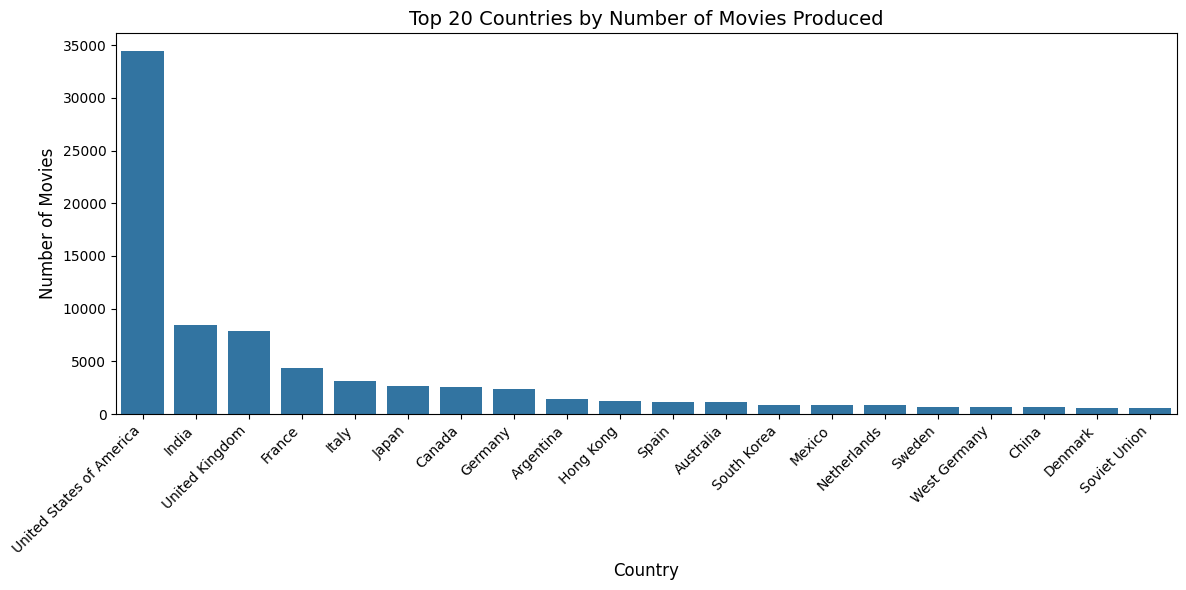

In [150]:
# When there are collaborations, we will "explode" i.e. create a new row but with different country 
if isinstance(df_countries['Country Name'].iloc[0], list):
    df_countries_exploded = df_countries.explode('Country Name')

# Counting the number of movies produced by each country
country_movie_counts = df_countries_exploded['Country Name'].value_counts()

# Taking the top 20 countries
top_countries = country_movie_counts.head(20)

# Plotting our work in a bar graph 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 20 Countries by Number of Movies Produced', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Displaying the plot
plt.show()

These results can be explained by the unique strengths and historical factors of their film industries:

The United States leads significantly due to Hollywood’s global influence, extensive infrastructure, and substantial funding, enabling high film output and widespread distribution. Hollywood’s scale and access to international markets make U.S. films widely accessible and frequently successful worldwide.

India’s Bollywood is the world’s largest film industry by output, driven by high demand from India’s massive, culturally diverse population. Bollywood's focus on genres that resonate deeply within its domestic audience, like musicals and romantic dramas, fuels its substantial production volume.

The United Kingdom, France, and Italy each have deep-rooted film traditions and government-supported cinema, which foster strong domestic production. For instance, France’s film culture, dating back to the invention of cinema, is supported by policies that protect local films, allowing for high-quality output and international acclaim.

### Box Office Revenue by Country:

In this section, we explore box office revenue across various countries to identify where movies generate the most significant earnings. This analysis highlights the economic powerhouses of the global film market and provides insights into where films are most commercially successful.

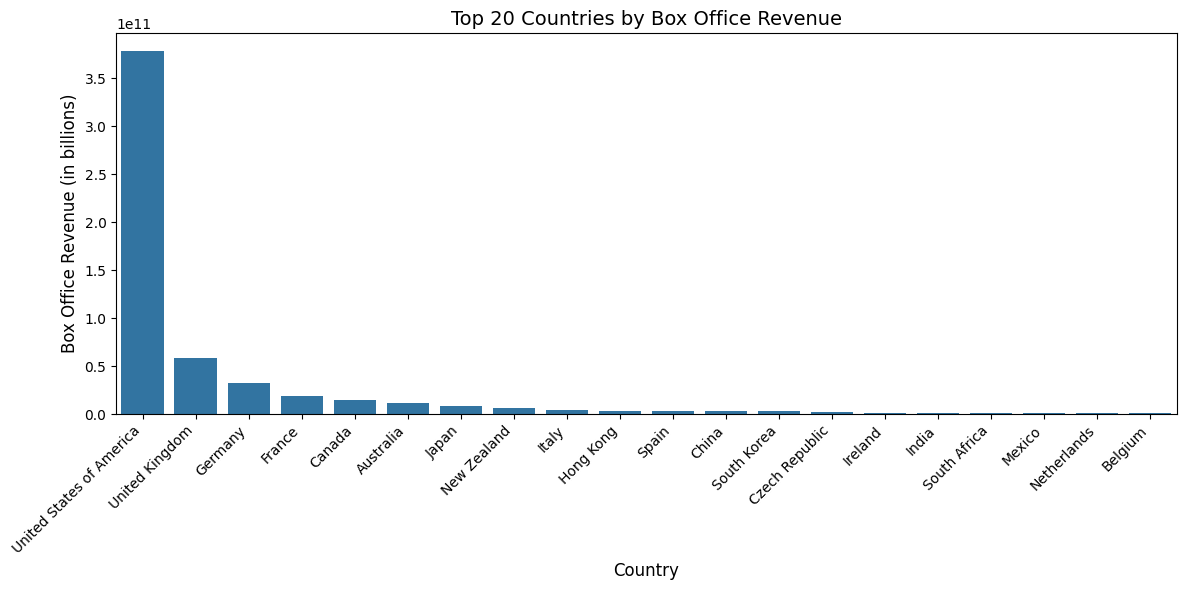

In [129]:
# Convert the 'Box Office Revenue' to numeric, handling non-numeric values
df_countries_exploded['Box Office Revenue'] = pd.to_numeric(df_countries_exploded['Box Office Revenue'], errors='coerce')

# Grouping the data by 'Country Name' and sum the box office revenue for each country
country_revenue = df_countries_exploded.groupby('Country Name')['Box Office Revenue'].sum()

# Sort the countries by box office revenue in descending order and select the top 20
top_countries_revenue = country_revenue.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_revenue.index, y=top_countries_revenue.values)
plt.title('Top 20 Countries by Box Office Revenue', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Box Office Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


It is important to note that the CMU Movies dataset contains a significant amount of missing data, particularly in the box office revenue field. These missing values may influence the results shown below, as the absence of data from certain movies or countries could skew the overall revenue figures. As a result, we observe a general trend that mirrors the movie count by country, with the USA and UK dominating the top spots. A key difference, however, is the noticeable absence of Bollywood's financial contribution, as the dataset lacks box office revenue data for many Indian movies.

### Language Analysis  

In this section, we analyze the distribution of languages in the global movie industry, exploring how language choices reflect cultural trends and regional preferences. By examining the languages associated with movies in the dataset, we can gain insights into the reach and influence of different linguistic markets within the film industry. This analysis helps us understand which languages are most prominent in global cinema and how they correlate with the production and success of films across various countries.

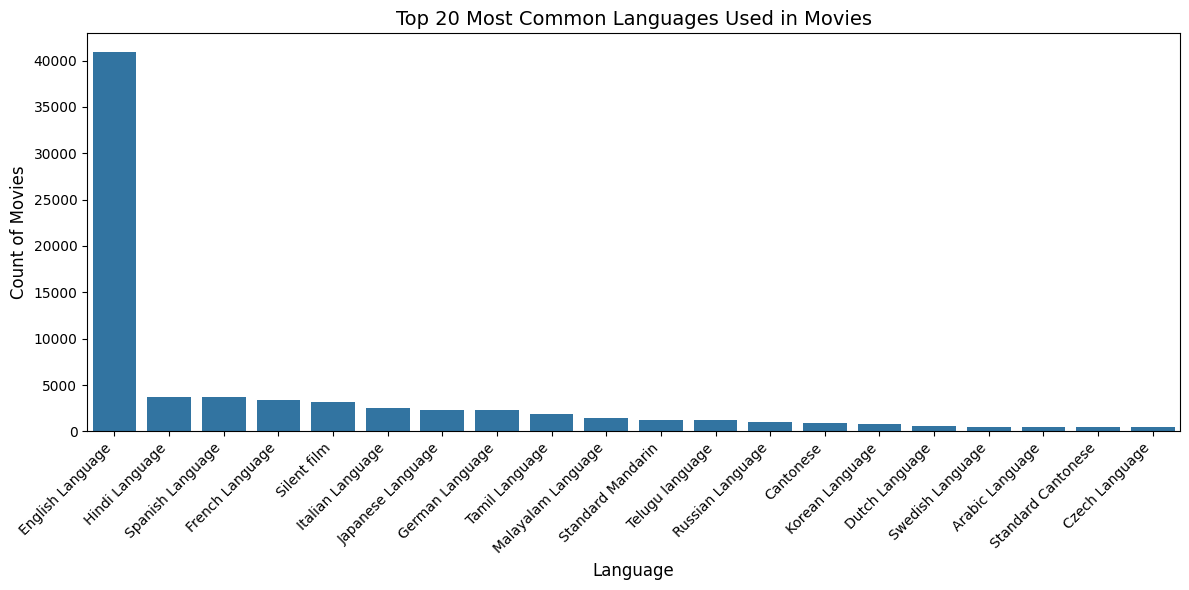

In [135]:
# If 'Language Name' contains lists, then we will explode the column entry
if isinstance(df_countries['Language Name'].iloc[0], list):
    df_countries_exploded_languages = df_countries.explode('Language Name')

# Group by language and count the occurrences
language_counts = df_countries_exploded_languages['Language Name'].value_counts()

# Get the top 20 most common languages
top_20_languages = language_counts.head(20)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_languages.index, y=top_20_languages.values)
plt.title('Top 20 Most Common Languages Used in Movies', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Count of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

English dominates significantly in this dataset for two key reasons. First, American movies represent the largest share of films in the dataset, which naturally skews the language distribution toward English. The United States is a major player in global cinema, with Hollywood producing a large volume of internationally distributed films, many of which are in English.

Secondly, English is known as the international language, so more people speak it. The broader trends in global language distribution also help explain why languages like French, Spanish, and Hindi are prominent in the top spots. These languages are not only spoken by large populations but also have significant cultural and media influence. With more viewers speaking these languages, films in these languages have greater opportunities for success both locally and internationally, reinforcing their presence in the dataset. Thus, the dominance of English and other major languages reflects both the volume of films produced and the global reach of these linguistic markets.

Another analysis we can do is to associate languages with the countries where they are most prevalent. By identifying which countries predominantly speak certain languages, we can uncover patterns that link cultural, linguistic, and market dynamics to the success and visibility of films. This analysis is relevant because it helps contextualize the prominence of specific languages in the movie dataset, illustrating how language can influence film popularity and success in different regions.

### Genre by Country 

In this section, we explore the genre preferences of different countries by analyzing which genres are most prevalent in each region. By examining the distribution of genres across countries, we can gain insights into the cultural tastes, trends, and influences that shape the movie industry in various parts of the world. Understanding genre preferences is crucial for identifying the types of movies that resonate most with audiences in specific regions, and how these preferences may influence a film's success in different markets.


First, we shall examine, in general, what the top genres are across the dataset. This will give us an overview of the most popular genres on a global scale before diving deeper into the preferences of individual countries. 

It's important to note that a movie can belong to more than one genre. As a result, we will "explode" the genre lists—meaning, for each movie, we will treat every genre listed as a separate entry and attribute a +1 count for each genre mentioned. This approach allows us to accurately capture the distribution of multiple genres per movie and gives a clearer picture of genre popularity across the dataset.











In [ ]:
# Assuming 'Genre Name' contains a list of genres
df_exploded_genre= df_countries.explode('Genre Name')

# Counting the frequency of each genre
genre_counts = df_exploded_genre['Genre Name'].value_counts()

# Getting the top 20 genres
top_20_genres = genre_counts.head(20)

# Displaying the result
top_20_genres

Genre Name
Drama               34007
Comedy              16349
Romance Film        10234
Black-and-white      9094
Action               8798
Thriller             8744
Short Film           8141
World cinema         7155
Crime Fiction        6948
Indie                6897
Documentary          5630
Horror               5280
Silent film          5250
Adventure            4963
Family Film          4598
Action/Adventure     4561
Comedy film          4362
Musical              4160
Animation            3534
Romantic drama       3372
Name: count, dtype: int64

The results of the genre distribution align with our expectations based on the global film market and audience preferences. Here's a couple of reasons explaining the top genre rankings:

- Drama leading with the highest count is not surprising, as it is a versatile genre that spans multiple themes and attracts a broad range of viewers. Many successful films, from small-scale indie projects to big-budget blockbusters, fall under this category.

- Comedy also ranks highly, reflecting the universal appeal of humor. Comedy films are widely enjoyed across cultures and languages, making them a staple in both mainstream and independent cinema.

- World cinema and Romance Film are also prominent, showcasing the significant demand for films that explore different cultures and universal themes of love, which are always popular globally.

In [159]:
# Explode the genre lists for each country
df_exploded_genre_by_country = df_countries_exploded.explode('Genre Name')

# Grouping by Country and finding the most frequent genre for each country
top_genre_by_country = df_exploded_genre_by_country.groupby('Country Name')['Genre Name'].agg(lambda x: x.mode()[0])

top_20_countries_with_genres = top_genre_by_country.loc[top_countries.index]

# Displaying the result
top_20_countries_with_genres

Country Name
United States of America              Drama
India                                 Drama
United Kingdom                        Drama
France                                Drama
Italy                                 Drama
Japan                       Japanese Movies
Canada                                Drama
Germany                               Drama
Argentina                   Black-and-white
Hong Kong                    Chinese Movies
Spain                                 Drama
Australia                             Drama
South Korea                           Drama
Mexico                                Drama
Netherlands                           Drama
Sweden                                Drama
West Germany                          Drama
China                        Chinese Movies
Denmark                               Drama
Soviet Union                          Drama
Name: Genre Name, dtype: object

The results indicating that 'Drama' is the most frequent genre in many of the top movie-producing countries make sense when considering the global popularity and versatility of the genre.

However, the genres 'Japanese Movies' and 'Chinese Movies' are not quite fitting in the same way as genres like 'Comedy' or 'Action.' These terms represent the origin of the movie rather than a specific genre of storytelling. To get a clearer picture of the most popular genres in these countries, let's examine the second most common genre for each.

In [160]:
# Explode the genre lists for each country
df_exploded_genre_by_country = df_countries_exploded.explode('Genre Name')

# Grouping by Country and finding the most frequent genre for each country
second_top_genre_by_country = df_exploded_genre_by_country.groupby('Country Name')['Genre Name'].agg(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else None)

# Get the second most common genre for the top 20 countries
top_20_countries_with_second_genres = second_top_genre_by_country.loc[top_countries.index]

# Displaying the result
top_20_countries_with_second_genres

Country Name
United States of America             Comedy
India                          World cinema
United Kingdom                       Comedy
France                         World cinema
Italy                          World cinema
Japan                                 Drama
Canada                             Thriller
Germany                        World cinema
Argentina                             Drama
Hong Kong                      World cinema
Spain                          World cinema
Australia                      World cinema
South Korea                    World cinema
Mexico                          Comedy film
Netherlands                          Comedy
Sweden                         World cinema
West Germany                   World cinema
China                                 Drama
Denmark                              Comedy
Soviet Union                Black-and-white
Name: Genre Name, dtype: object

The second most common genres in the top 20 movie-producing countries—such as Comedy and World Cinema—make more sense when considering global film trends. These genres align better with worldwide audience preferences than labels like Chinese Movies and Japanese Movies, which are more about the origin of films rather than their thematic content, making the second most common genres a more meaningful reflection of global tastes.








### Section Conclusion

In this section, we examined the global distribution of movies by country, language, and genre to uncover patterns that influence a movie’s potential for success. 

The dominance of countries like the United States in movie production is largely due to the global reach of the English language, the world's most spoken and widely understood language, which provides access to a vast audience.

Additionally, countries with strong cultural industries, such as India and the United Kingdom, reflect the significance of local languages like Hindi and English in broadening a film's reach. On the other hand, the prevalence of genres like Drama, Comedy, and World Cinema underscores global viewing preferences and highlights the importance of cultural relevance in movie success. 

In the end, the link between popular genres, languages, and movie production by country shows that a larger, more diverse audience increases the likelihood of a movie's success. By recognizing these patterns, we can better predict which types of films will appeal to viewers in different regions, highlighting that cultural context and language are key to a movie's success.